# Exploratory data analysis

## Manual exploration of data

In [21]:
import pandas as pd
FILEPATH = '../Data/raw/mmc1.csv'
df = pd.read_csv(FILEPATH)
df.head()

C:\Users\NOSOGH\AppData\Local\Temp\ipykernel_28120\3802832329.py:3: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(FILEPATH)


,ID,test_type,basin_valley,Depth (m),qc (MPa),fs (kPa),u2 (kPa),Vs (m/s),qt (MPa),Rf (%),...,U2 (-),SBT (-),SBTn (-),Mod. SBTn (-),n,Ic (-),Ic SBT (-),Ib (-),EN_ISO_14688_classes,Oberhollenzer_classes
0,0,CPT,Zell basin,0.02,1.15,1.00,NaN,NaN,1.77,0.06,...,NaN,0.00,0.00,0.00,-0.12,2.56,2.23,25.61,NaN,NaN
1,0,CPT,Zell basin,0.04,2.85,1.00,NaN,NaN,2.99,0.03,...,NaN,0.00,0.00,0.00,0.33,1.23,2.02,256.60,NaN,NaN
2,0,CPT,Zell basin,0.06,4.80,1.00,NaN,NaN,4.76,0.06,...,NaN,0.00,0.00,0.00,0.28,1.16,1.80,264.66,NaN,NaN
3,0,CPT,Zell basin,0.08,6.40,6.00,NaN,NaN,6.12,0.07,...,NaN,0.00,0.00,0.00,0.27,1.12,1.69,275.17,NaN,NaN
4,0,CPT,Zell basin,0.10,6.90,6.00,NaN,NaN,6.91,0.10,...,NaN,0.00,0.00,0.00,0.27,1.11,1.65,267.92,NaN,NaN


In [2]:
df.columns

Index(['ID', 'test_type', 'basin_valley', 'Depth (m)', 'qc (MPa)', 'fs (kPa)',
       'u2 (kPa)', 'Vs (m/s)', 'qt (MPa)', 'Rf (%)', 'γ (kN/m³)', 'σ,v (kPa)',
       'u0 (kPa)', 'σ',v (kPa)', 'Qt (-)', 'Qtn (-)', 'Fr (%)', 'Bq (-)',
       'U2 (-)', 'SBT (-)', 'SBTn (-)', 'Mod. SBTn (-)', 'n', 'Ic (-)',
       'Ic SBT (-)', 'Ib (-)', 'EN_ISO_14688_classes',
       'Oberhollenzer_classes'],
      dtype='object')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2516979 entries, 0 to 2516978
Data columns (total 28 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     int64  
 1   test_type              object 
 2   basin_valley           object 
 3   Depth (m)              float64
 4   qc (MPa)               float64
 5   fs (kPa)               float64
 6   u2 (kPa)               float64
 7   Vs (m/s)               float64
 8   qt (MPa)               float64
 9   Rf (%)                 float64
 10  γ (kN/m³)              float64
 11  σ,v (kPa)              float64
 12  u0 (kPa)               float64
 13  σ',v (kPa)             float64
 14  Qt (-)                 float64
 15  Qtn (-)                float64
 16  Fr (%)                 float64
 17  Bq (-)                 float64
 18  U2 (-)                 float64
 19  SBT (-)                float64
 20  SBTn (-)               float64
 21  Mod. SBTn (-)          float64
 22  n                 

Features defined by Rauter and Tschuchnigg (2019). Note: several features are derived feature engineered features.
- Derived from other features: 'Rf (%)', 'Qt (-)', 'Qtn (-)', 'Fr (%)'
- Calculated: 'γ (kN/m³)', 'σ,v (kPa)',
       'u0 (kPa)', 'σ',v (kPa)', 'Depth (m)'
- Measured: 'qc (MPa)', 'fs (kPa)'

In [22]:
FEATURES = ['Depth (m)', 'qc (MPa)', 'fs (kPa)','Rf (%)', 'σ,v (kPa)', 'u0 (kPa)',"σ',v (kPa)", 'Qtn (-)', 'Fr (%)']
SITE_INFO = ['ID', 'test_type', 'basin_valley']
LABELS_O = ['Oberhollenzer_classes']
df = df.loc[:,SITE_INFO + FEATURES + LABELS_O]
df.head()

,ID,test_type,basin_valley,Depth (m),qc (MPa),fs (kPa),Rf (%),"σ,v (kPa)",u0 (kPa),"σ',v (kPa)",Qtn (-),Fr (%),Oberhollenzer_classes
0,0,CPT,Zell basin,0.02,1.15,1.00,0.06,0.38,0.20,0.18,8.04,0.06,NaN
1,0,CPT,Zell basin,0.04,2.85,1.00,0.03,0.76,0.39,0.37,185.53,0.03,NaN
2,0,CPT,Zell basin,0.06,4.80,1.00,0.06,1.14,0.59,0.55,205.79,0.06,NaN
3,0,CPT,Zell basin,0.08,6.40,6.00,0.07,1.52,0.78,0.74,226.79,0.07,NaN
4,0,CPT,Zell basin,0.10,6.90,6.00,0.10,1.90,0.98,0.92,239.52,0.10,NaN


In [5]:
df.isnull().sum()

ID                             0
test_type                      0
basin_valley                   0
Depth (m)                      0
qc (MPa)                     817
fs (kPa)                    1533
Rf (%)                      1316
σ,v (kPa)                    127
u0 (kPa)                     127
σ',v (kPa)                   127
Qtn (-)                      214
Fr (%)                      2704
Oberhollenzer_classes    1486510
dtype: int64

In [23]:
df = df.dropna()
df.head()

,ID,test_type,basin_valley,Depth (m),qc (MPa),fs (kPa),Rf (%),"σ,v (kPa)",u0 (kPa),"σ',v (kPa)",Qtn (-),Fr (%),Oberhollenzer_classes
1486510,849,CPT,Zell basin,0.01,0.00,0.00,0.00,0.19,0.10,0.09,-27.09,0.00,4.00
1486511,849,CPT,Zell basin,0.02,0.00,0.00,0.00,0.38,0.20,0.18,-14.58,0.00,4.00
1486512,849,CPT,Zell basin,0.03,0.00,0.00,0.00,0.57,0.29,0.28,-10.41,0.00,4.00
1486513,849,CPT,Zell basin,0.04,0.00,0.00,0.00,0.76,0.39,0.37,-8.32,0.00,4.00
1486514,849,CPT,Zell basin,0.05,0.00,0.00,0.00,0.95,0.49,0.46,-7.07,0.00,4.00


In [7]:
df.shape

(1028487, 13)

The balance of the target label

In [9]:
df["Oberhollenzer_classes"].value_counts()

Oberhollenzer_classes
5.0    208247
2.0    192904
6.0    180407
7.0    163684
1.0     99211
4.0     98749
0.0     78436
3.0      6849
Name: count, dtype: int64

In [10]:
df["basin_valley"].value_counts()

basin_valley
Salzburg basin                   512548
Zell basin                       284332
Flachgau                          89744
Upper Salzach valley              39410
Saalfelden basin                  28005
Lower Salzach valley              19503
Gastein valley                    13694
Wildschönau region                10871
Pinzgau Saalach valley             8209
Hallein basin                      7185
Enns valley - Radtstadt basin      6160
Pinzgau (Hinterthal, Dienten)      3495
Eisenstadt-Sopron basin            2544
Abtenau basin                      2077
Glemm valley                        710
Name: count, dtype: int64

In [11]:
# run describe on the numberical features
pd.set_option('display.float_format', '{:.2f}'.format)
numeric_features = df[FEATURES].select_dtypes(include=["number"]).columns
df[numeric_features].describe()
# pd.reset_option('display.float_format')

,Depth (m),qc (MPa),fs (kPa),Rf (%),"σ,v (kPa)",u0 (kPa),"σ',v (kPa)",Qtn (-),Fr (%)
count,1028487.00,1028487.00,1028487.00,1028487.00,1028487.00,1028487.00,1028487.00,1028487.00,1028487.00
mean,13.23,5.33,54.61,2.39,251.30,122.64,128.66,62.94,3.56
std,10.57,8.39,70.30,35.10,200.74,103.14,99.58,118.64,81.37
min,0.01,-1.37,-99.90,-100.00,0.19,0.00,0.09,-127.57,-100.00
25%,5.32,0.96,16.20,0.69,101.08,45.71,54.13,5.19,0.75
50%,11.06,2.30,32.50,1.37,210.14,101.14,108.90,22.47,1.68
75%,18.07,5.98,66.00,2.48,343.33,170.11,174.70,60.56,3.34
max,75.92,101.73,1591.40,22000.00,1442.48,744.78,697.70,1001.00,33166.67


## Automated EDA

ydata-profiling for automated EDA

In [12]:
dfy = df.copy()[FEATURES + LABELS_O]
dfy.head()

,Depth (m),qc (MPa),fs (kPa),Rf (%),"σ,v (kPa)",u0 (kPa),"σ',v (kPa)",Qtn (-),Fr (%),Oberhollenzer_classes
1486510,0.01,0.00,0.00,0.00,0.19,0.10,0.09,-27.09,0.00,4.00
1486511,0.02,0.00,0.00,0.00,0.38,0.20,0.18,-14.58,0.00,4.00
1486512,0.03,0.00,0.00,0.00,0.57,0.29,0.28,-10.41,0.00,4.00
1486513,0.04,0.00,0.00,0.00,0.76,0.39,0.37,-8.32,0.00,4.00
1486514,0.05,0.00,0.00,0.00,0.95,0.49,0.46,-7.07,0.00,4.00


In [13]:
# Change type of labels to strings, so ydata-profiling interprets it as a categorical variable.
dfy['Oberhollenzer_classes'] = dfy['Oberhollenzer_classes'].astype(str)
dfy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1028487 entries, 1486510 to 2516978
Data columns (total 10 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Depth (m)              1028487 non-null  float64
 1   qc (MPa)               1028487 non-null  float64
 2   fs (kPa)               1028487 non-null  float64
 3   Rf (%)                 1028487 non-null  float64
 4   σ,v (kPa)              1028487 non-null  float64
 5   u0 (kPa)               1028487 non-null  float64
 6   σ',v (kPa)             1028487 non-null  float64
 7   Qtn (-)                1028487 non-null  float64
 8   Fr (%)                 1028487 non-null  float64
 9   Oberhollenzer_classes  1028487 non-null  object 
dtypes: float64(9), object(1)
memory usage: 86.3+ MB


In [15]:
dfy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1028487 entries, 1486510 to 2516978
Data columns (total 10 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Depth (m)              1028487 non-null  float64
 1   qc (MPa)               1028487 non-null  float64
 2   fs (kPa)               1028487 non-null  float64
 3   Rf (%)                 1028487 non-null  float64
 4   σ,v (kPa)              1028487 non-null  float64
 5   u0 (kPa)               1028487 non-null  float64
 6   σ',v (kPa)             1028487 non-null  float64
 7   Qtn (-)                1028487 non-null  float64
 8   Fr (%)                 1028487 non-null  float64
 9   Oberhollenzer_classes  1028487 non-null  object 
dtypes: float64(9), object(1)
memory usage: 86.3+ MB


In [14]:
from ydata_profiling import ProfileReport

profile = ProfileReport(dfy, title="Profiling report")
profile.to_file("dataset_profiling_cpt.html")

c:\Users\NOSOGH\AppData\Local\pypoetry\Cache\virtualenvs\cpt-to-soiltype-KPmae4HV-py3.11\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 39.61it/s]


What do you need to check in the dataset?
- What distributions do the features have?
- Are there any missing values?
- Are there any duplicates?
- Are there any outliers? Be cautious with this one, as outliers can be valid data points.
- Are there any relationships between the features? Some features might be removed if they are highly correlated.
- Are there any relationships between the features and the target variable? Only in regression.
- Are there any relationships between the features and the target variable that are not linear? Only in regression.
- Are the labels balanced?


Trends in the data
- Not normally distributed
- Duplicate values
- Correlated features
-Outliers present

## Preprocessing

In [16]:
df.shape

(1028487, 13)

Duplicate values

In [24]:
df = df.drop_duplicates(subset=FEATURES)
df.shape

(1016728, 13)

### Outliers

Hardcoded values (values that are not possible in the real world) are removed.

In [25]:
# hardcoded
df = df[df['qc (MPa)'] > 0]
df = df[df['u0 (kPa)'] >= 0]
df = df[df['Qtn (-)'] > 0]
df = df[(df['fs (kPa)'] < 1200) & (df['fs (kPa)'] > 0)]
# df = df[(df['Rf (%)'] < 10) & (df['Rf (%)'] > 0)]
df = df[df['Rf (%)'] > 0]
df = df[(df['Fr (%)'] < 10) & (df['Fr (%)'] > 0)]
# skip samples with label 3.0
# df = df[df['Oberhollenzer_classes'] != 3.0] # due to low sample size
df = df[df['Oberhollenzer_classes'] != 0.0] # due to low sample size
df.shape

(890425, 13)

In [27]:
%matplotlib inline

Univariate outlier detection - we exemplify for one feature

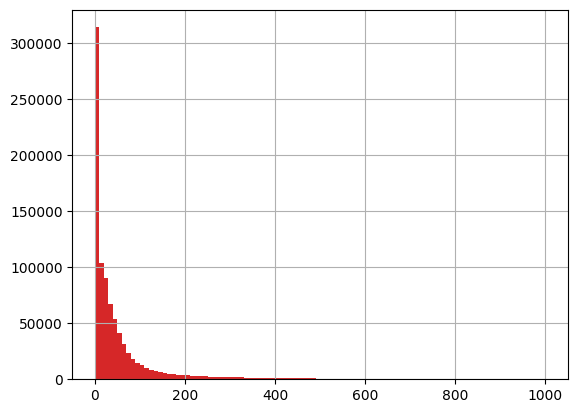

In [30]:
import matplotlib.pyplot as plt
df["Qtn (-)"].hist(bins=100)
plt.show()

In [33]:
# univariate
from pyod.models.mad import MAD

threshold = 7.0  # Typical value, can be adjusted for sensitivity
mad = MAD(threshold=threshold)

# Fit the model on the column
mad.fit(df[['Qtn (-)']])

# Predict outliers (1 for outlier, 0 for inlier)
outliers = mad.predict(df[['Qtn (-)']])

# Filter the DataFrame to exclude outliers
df_no_outliers = df[outliers == 0]

In [34]:
sum(outliers)

np.int64(55426)

<Axes: >

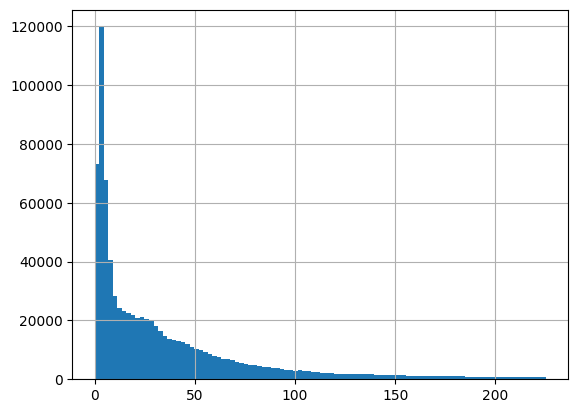

In [35]:
df_no_outliers["Qtn (-)"].hist(bins=100)

Multivariate outlier detection

In [36]:
df[FEATURES].info()

<class 'pandas.core.frame.DataFrame'>
Index: 890425 entries, 1486548 to 2516970
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Depth (m)   890425 non-null  float64
 1   qc (MPa)    890425 non-null  float64
 2   fs (kPa)    890425 non-null  float64
 3   Rf (%)      890425 non-null  float64
 4   σ,v (kPa)   890425 non-null  float64
 5   u0 (kPa)    890425 non-null  float64
 6   σ',v (kPa)  890425 non-null  float64
 7   Qtn (-)     890425 non-null  float64
 8   Fr (%)      890425 non-null  float64
dtypes: float64(9)
memory usage: 67.9 MB


In [37]:
from pyod.models.iforest import IForest

outlier_confidence_threshold = 0.95  # Adjust threshold for your use case

# Initialize and fit the Isolation Forest model
iforest = IForest(n_estimators=100)
iforest.fit(df[FEATURES])

# Get the outlier probabilities
probs = iforest.predict_proba(df[FEATURES])[:, 1]

# Create a mask for outliers based on the confidence threshold
is_outlier = probs > outlier_confidence_threshold
outliers = df[is_outlier]
non_outliers = df[~is_outlier]

# Display results
num_outliers = len(outliers)
print(f"Number of outliers with Isolation Forest: {num_outliers}")
print(f"Percentage of outliers: {num_outliers / len(df):.4f}")
print("Outlier samples:\n", outliers)

# Cleaned DataFrame excluding outliers
df_cleaned = df[~is_outlier]

c:\Users\NOSOGH\AppData\Local\pypoetry\Cache\virtualenvs\cpt-to-soiltype-KPmae4HV-py3.11\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(


Number of outliers with Isolation Forest: 13
Percentage of outliers: 0.0000
Outlier samples:
           ID test_type    basin_valley  Depth (m)  qc (MPa)  fs (kPa)  Rf (%)  \
1749143  972      SCPT  Salzburg basin      74.91     10.28    369.90    3.60   
1749144  972      SCPT  Salzburg basin      74.92     10.13    383.70    3.79   
1749145  972      SCPT  Salzburg basin      74.93     10.33    389.30    3.77   
1749146  972      SCPT  Salzburg basin      74.94     10.53    394.80    3.75   
1749147  972      SCPT  Salzburg basin      74.95     13.75    395.10    2.87   
1749148  972      SCPT  Salzburg basin      74.96     15.53    395.40    2.55   
1749149  972      SCPT  Salzburg basin      74.97     19.37    410.70    2.12   
1749150  972      SCPT  Salzburg basin      74.98     21.35    414.60    1.94   
1749151  972      SCPT  Salzburg basin      74.99     23.61    410.50    1.74   
1749152  972      SCPT  Salzburg basin      75.00     24.01    406.40    1.69   
1749153  972   

A classic splitting of the dataset in train and test sets

In [42]:
from sklearn.model_selection import train_test_split

X = df_cleaned[FEATURES]
y = df_cleaned['Oberhollenzer_classes']
seed = 10
test_size = 0.25
train, test = train_test_split(df_cleaned, test_size=test_size, random_state=seed, stratify=y)

In [43]:
train.shape, test.shape

((667809, 13), (222603, 13))

In [44]:
train["Oberhollenzer_classes"].value_counts(normalize=True)

Oberhollenzer_classes
5.00   0.23
2.00   0.20
6.00   0.19
7.00   0.17
4.00   0.11
1.00   0.10
3.00   0.00
Name: proportion, dtype: float64

In [45]:
test["Oberhollenzer_classes"].value_counts(normalize=True)

Oberhollenzer_classes
5.00   0.23
2.00   0.20
6.00   0.19
7.00   0.17
4.00   0.11
1.00   0.10
3.00   0.00
Name: proportion, dtype: float64

Typical geotechnical problem: data from same borehole should not be split between train and test set. Then there is a risk of data leakage.

In [47]:
unique_ids = df['ID'].unique()
train_ids, _ = train_test_split(unique_ids, test_size=test_size, random_state=seed)
train_ids

array([1281, 1114, 1253,  981, 1082,  930, 1105, 1277, 1280,  989, 1129,
        976, 1036,  906,  887,  916, 1191,  862,  947,  980, 1312,  934,
       1230,  951, 1293, 1151, 1288, 1240,  926, 1015,  997, 1226, 1042,
        963, 1035, 1206,  902,  877, 1128,  914,  959, 1005, 1187,  960,
        888,  955, 1224, 1063, 1025,  925, 1133, 1051,  971, 1266, 1198,
        919, 1012, 1217, 1077,  908, 1267, 1299,  907,  937, 1022, 1270,
       1201, 1180,  942,  956,  879, 1149, 1043, 1101,  867, 1172,  851,
        909,  913,  875, 1222, 1075, 1066, 1296, 1234,  870, 1131, 1039,
       1059, 1132, 1018, 1071, 1200,  974, 1047, 1165, 1079,  954, 1155,
       1319, 1190, 1150, 1127,  886,  988, 1189, 1116, 1097, 1092, 1062,
       1307, 1303, 1245, 1302, 1186,  970,  885, 1122, 1248,  869, 1156,
        982, 1054, 1158, 1237, 1041, 1050,  958, 1099,  855,  998, 1218,
       1214, 1049, 1009, 1271, 1056, 1328,  871, 1167,  977,  899, 1160,
       1300, 1202, 1324, 1103, 1211, 1252, 1236,  9

In [48]:
train_df = df[df['ID'].isin(train_ids)]
test_df = df[~df['ID'].isin(train_ids)]

In [49]:
train_df.shape, test_df.shape

((661646, 13), (228779, 13))

In [50]:
train_df["Oberhollenzer_classes"].value_counts(normalize=True)

Oberhollenzer_classes
5.00   0.24
7.00   0.19
6.00   0.18
2.00   0.18
4.00   0.11
1.00   0.10
3.00   0.00
Name: proportion, dtype: float64

In [51]:
test_df["Oberhollenzer_classes"].value_counts(normalize=True)

Oberhollenzer_classes
2.00   0.26
6.00   0.22
5.00   0.19
7.00   0.12
4.00   0.11
1.00   0.09
3.00   0.01
Name: proportion, dtype: float64

In [52]:
# another round in ydate-profiling with splitted dataset
from ydata_profiling import ProfileReport
dfy_train = train_df.copy()[FEATURES + LABELS_O]
dfy_test = test_df.copy()[FEATURES + LABELS_O]
dfy_train['Oberhollenzer_classes'] = dfy_train['Oberhollenzer_classes'].astype(str)
dfy_test['Oberhollenzer_classes'] = dfy_test['Oberhollenzer_classes'].astype(str)
profile_train = ProfileReport(dfy_train, title="Profiling report - Train")
profile_test = ProfileReport(dfy_test, title="Profiling report - Test")
comparison_report = profile_train.compare(profile_test)
comparison_report.to_file("dataset_profiling_comparison_cpt.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 25.38it/s]
